In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(1359, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

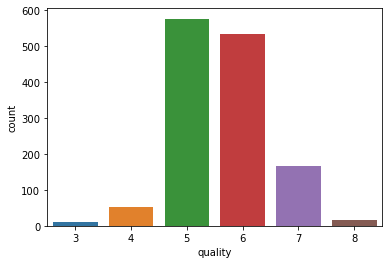

In [10]:
sns.countplot(x='quality',data=df)

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# making the quality column binary

In [12]:
def convert(val):
    if val>=7:
        return 1
    else:
        return 0

In [13]:
df['quality']=df['quality'].apply(convert)

0    1175
1     184
Name: quality, dtype: int64


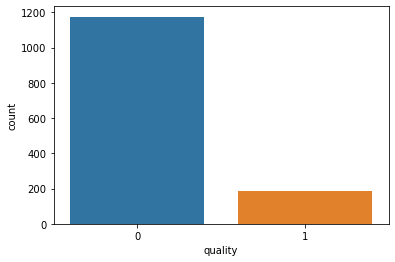

In [14]:
sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

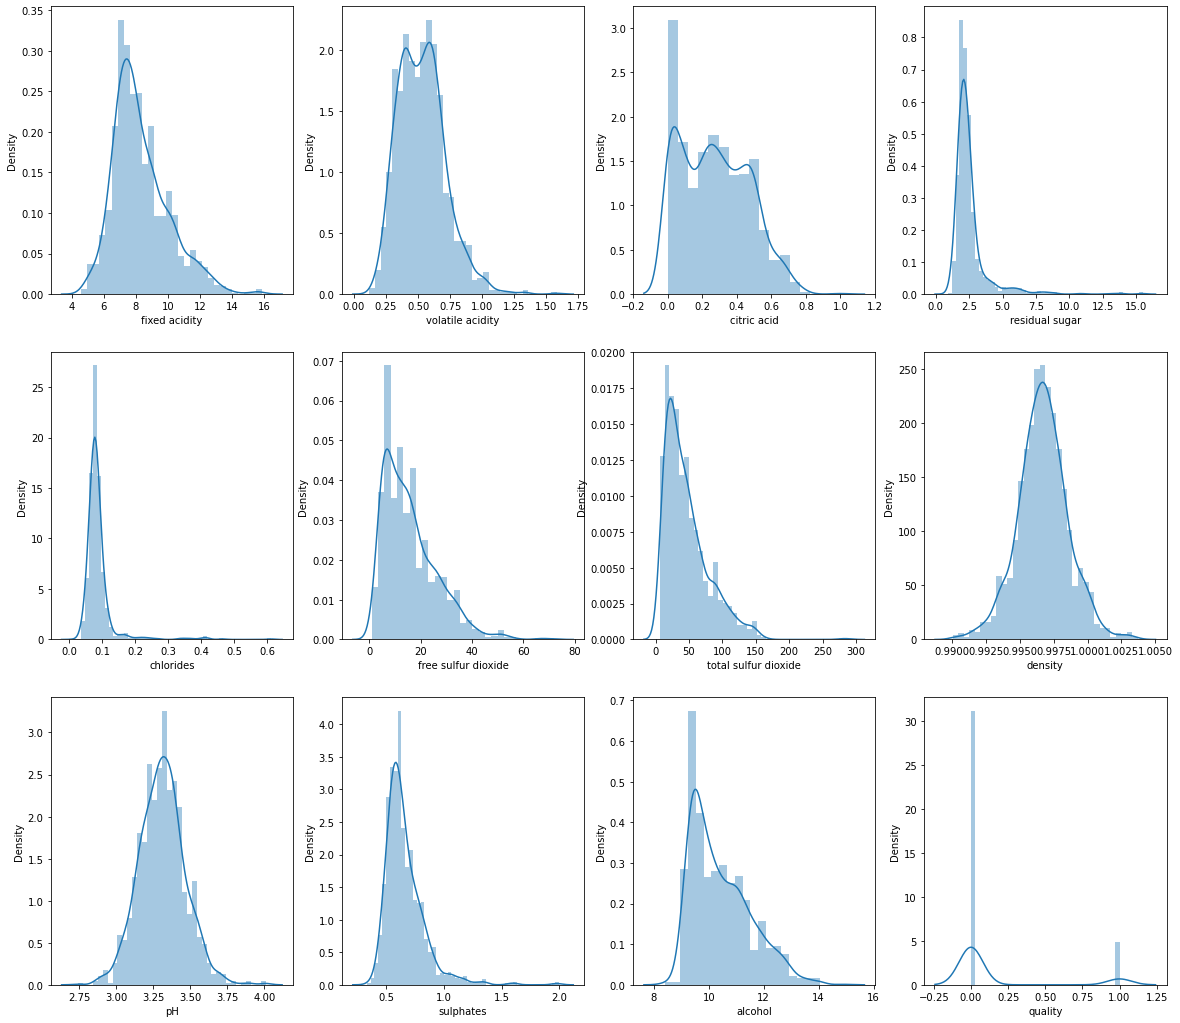

In [15]:
plt.figure(figsize=(20,18))
plotnumber=1

for column in df:
    if plotnumber<13:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
plt.show()

# checking for the outliers in the feature columns:¶

In [16]:
df_features=df.drop(['quality'],axis=1)

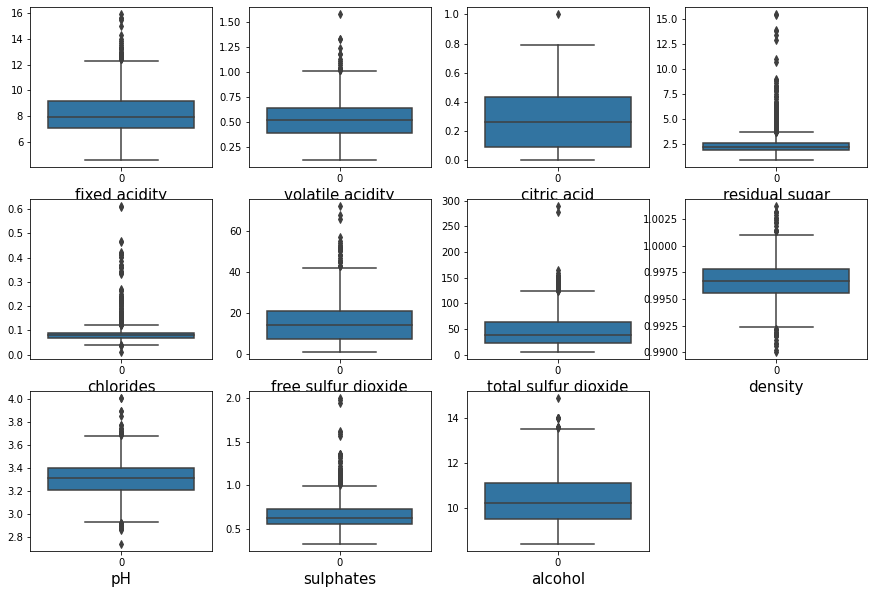

In [17]:
plt.figure(figsize=(15,10))
graph=1

for column in df_features:
    if graph<=12:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
        
        graph+=1
plt.show()

In [18]:
from scipy.stats import zscore

In [19]:
z_score=zscore(df)

abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

df.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,8.306295,0.525432,0.266142,2.378692,0.081825,15.167877,44.262308,0.996683,3.313632,0.641994,10.421886,0.136400
std,1.650493,0.173001,0.191153,0.827975,0.022701,9.344298,30.019403,0.001717,0.140892,0.129866,1.038469,0.343352
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996690,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.710000,11.100000,0.000000
max,13.500000,1.070000,0.790000,6.550000,0.236000,47.000000,147.000000,1.002200,3.750000,1.170000,13.600000,1.000000


In [20]:
df.shape

(1239, 12)

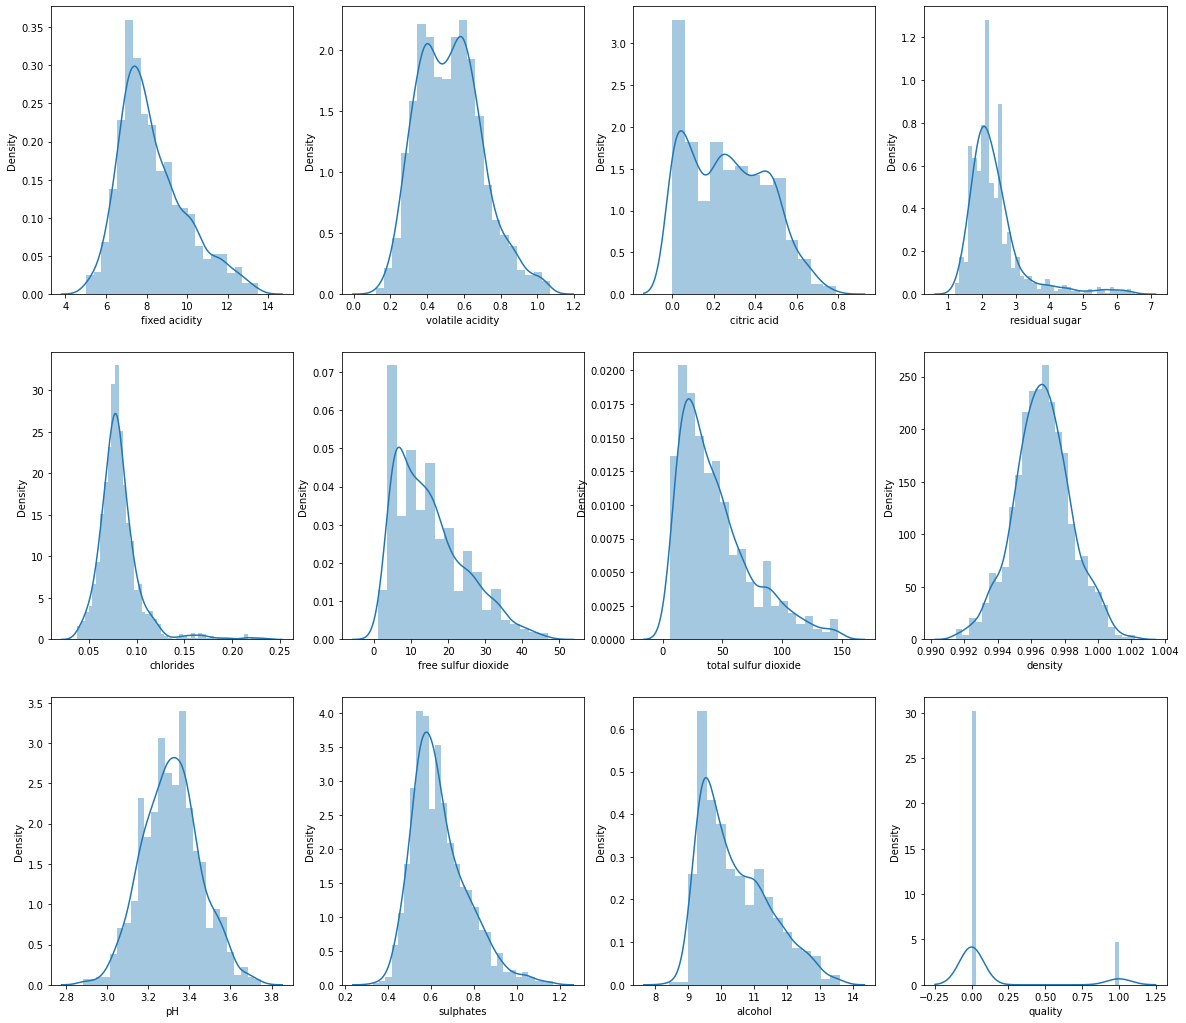

In [21]:
plt.figure(figsize=(20,18))
plotnumber=1

for column in df:
    if plotnumber<13:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
plt.show()

# Plotting the heatmap:

In [36]:
df_corr=df.corr().abs()

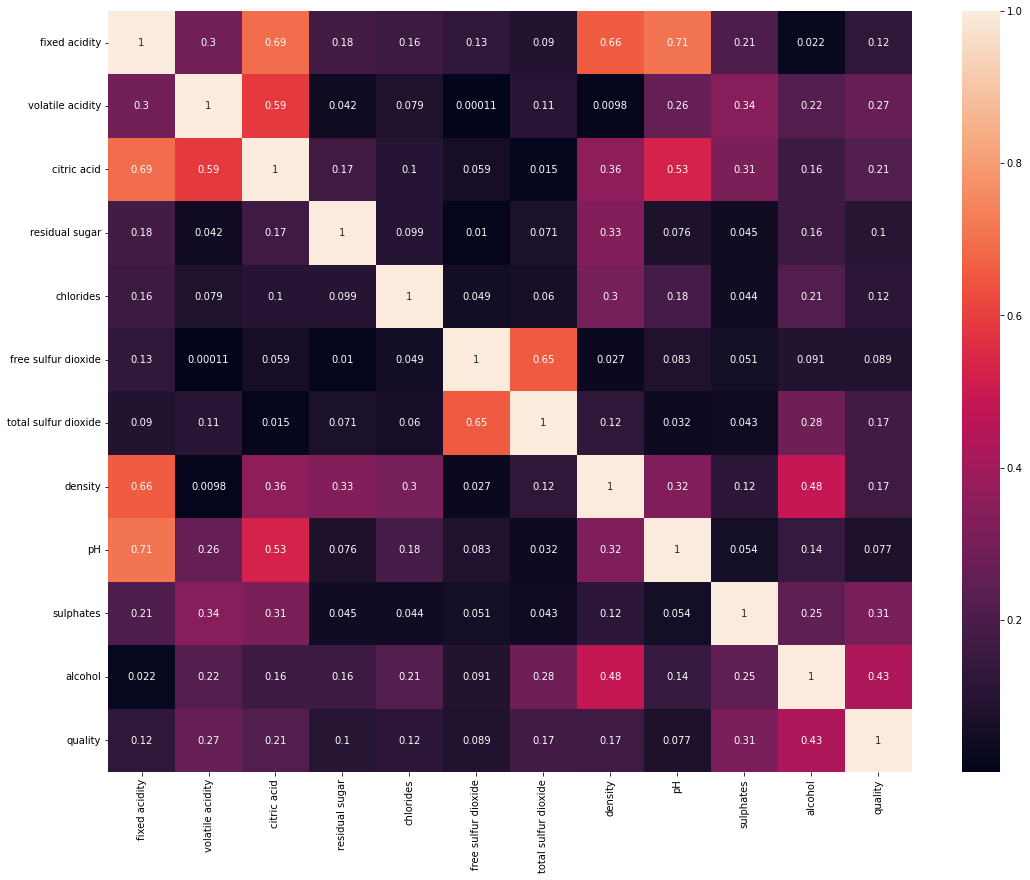

In [37]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

# checking the columns which are positively and negatively correlated with target columns:

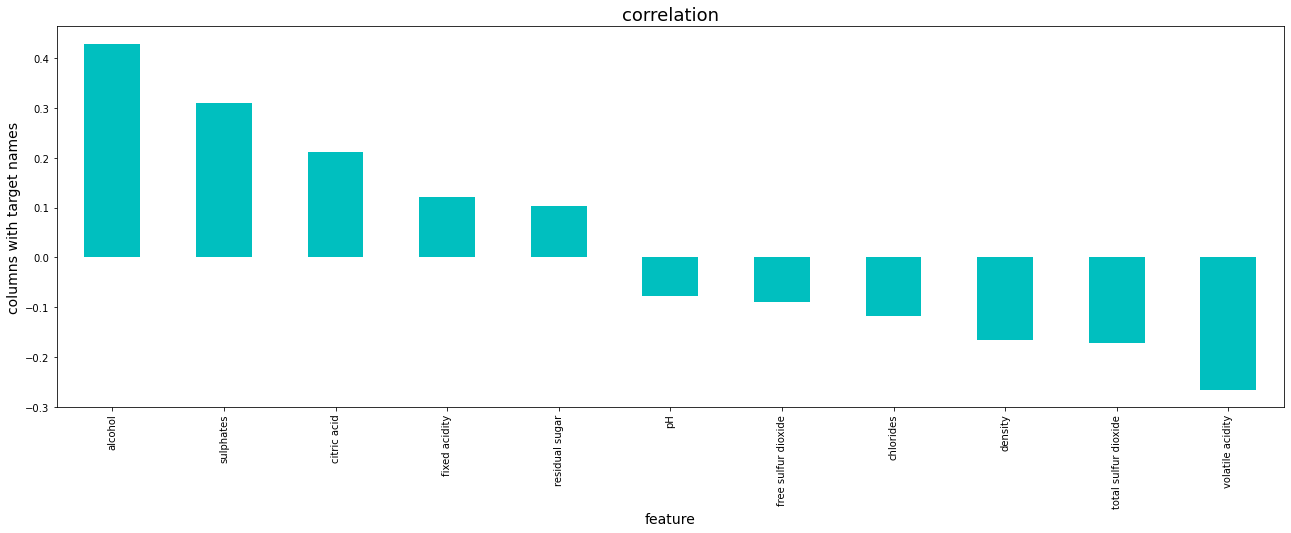

In [26]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

seems pH and fixed acidity are correlated.Let's check with scatter plot:

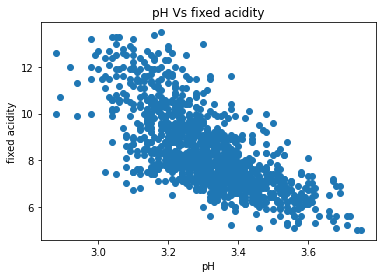

In [30]:
plt.scatter(df['pH'],df['fixed acidity'])
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.title('pH Vs fixed acidity')
plt.show()

seems that, not that much correlated

# checking for the VIF for multicollinearity problem or not:

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
x=df.drop(columns=['quality'])
y=df['quality']

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
x_scaled.shape[1]

11

In [35]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features']=x.columns

vif

,vif,features
0,7.960712,fixed acidity
1,1.855225,volatile acidity
2,3.155072,citric acid
3,1.618890,residual sugar
4,1.163867,chlorides
5,1.904153,free sulfur dioxide
6,2.181479,total sulfur dioxide
7,6.391211,density
8,3.228857,pH
9,1.323185,sulphates


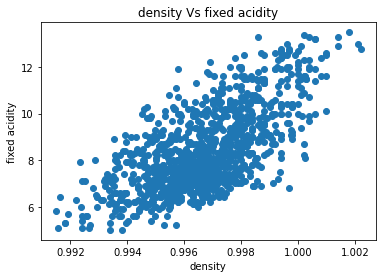

In [38]:
plt.scatter(df['density'],df['fixed acidity'])
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.title('density Vs fixed acidity')
plt.show()

In [39]:
x_new=df.drop(['fixed acidity','quality'],axis=1)
y=df['quality']

In [41]:
scaler=StandardScaler()
x_new_scaled=scaler.fit_transform(x_new)

In [42]:
x_new.shape

(1239, 10)

In [44]:
for i in range(0,100):
    x_new_train,x_new_test,y_train,y_test=train_test_split(x_new_scaled,y,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_new_train,y_train)
    pred_train=rf.predict(x_new_train)
    pred_test=rf.predict(x_new_test)
    print(f"at random state{i} , the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"at random state{i} , the testing accuracy is:-{accuracy_score(y_test,pred_test)}")

at random state0 , the training accuracy is:-1.0
at random state0 , the testing accuracy is:-0.8870967741935484
at random state1 , the training accuracy is:-1.0
at random state1 , the testing accuracy is:-0.8774193548387097
at random state2 , the training accuracy is:-1.0
at random state2 , the testing accuracy is:-0.8806451612903226
at random state3 , the training accuracy is:-1.0
at random state3 , the testing accuracy is:-0.8580645161290322
at random state4 , the training accuracy is:-1.0
at random state4 , the testing accuracy is:-0.8870967741935484
at random state5 , the training accuracy is:-1.0
at random state5 , the testing accuracy is:-0.864516129032258
at random state6 , the training accuracy is:-1.0
at random state6 , the testing accuracy is:-0.8548387096774194
at random state7 , the training accuracy is:-1.0
at random state7 , the testing accuracy is:-0.8870967741935484
at random state8 , the training accuracy is:-1.0
at random state8 , the testing accuracy is:-0.8677419354

In [54]:
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new_scaled,y,test_size=0.25,random_state=58)

In [55]:
rf.fit(x_new_train,y_train)

RandomForestClassifier()

In [56]:
pred_test=rf.predict(x_new_test)

In [57]:
print(accuracy_score(y_test,pred_test))

0.9096774193548387


In [58]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       276
           1       0.67      0.35      0.46        34

    accuracy                           0.91       310
   macro avg       0.80      0.67      0.71       310
weighted avg       0.90      0.91      0.90       310



In [59]:
param_grid={'n_estimators':[13,15],
            'criterion':['entropy','gini'],
           'max_depth':[10,15],
           'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }

In [61]:
gridsearch=GridSearchCV(estimator=rf,param_grid=param_grid)

In [62]:
gridsearch.fit(x_new_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [63]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 15}

In [64]:
rf=gridsearch.best_estimator_
rf.fit(x_new_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=15)

In [67]:
def metric_score(clf,x_new_train,x_new_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_new_train)
        print("accuracy score of training score : ",accuracy_score(y_train,y_pred))
        
    elif train==False:
        pred=clf.predict(x_new_test)
        print('accuracy score of testing score : ',accuracy_score(y_test,pred))
        print('\n \n classification report \n \n : ',classification_report(y_test,pred))

In [68]:
metric_score(rf,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(rf,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.930032292787944
accuracy score of testing score :  0.9

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.92      0.97      0.95       276
           1       0.58      0.32      0.42        34

    accuracy                           0.90       310
   macro avg       0.75      0.65      0.68       310
weighted avg       0.88      0.90      0.89       310



In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [103]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
clf=RandomForestClassifier()

In [116]:
x_new=df.drop(['fixed acidity','quality'],axis=1)
y=df['quality']

In [117]:
scaler=StandardScaler()
x_new_scaled=scaler.fit_transform(x_new)

In [118]:
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new_scaled,y,test_size=0.25,random_state=58)

In [119]:
lr.fit(x_new_train,y_train)

LogisticRegression()

In [120]:
metric_score(lr,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(lr,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.8869752421959096
accuracy score of testing score :  0.9064516129032258

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.93      0.97      0.95       276
           1       0.61      0.41      0.49        34

    accuracy                           0.91       310
   macro avg       0.77      0.69      0.72       310
weighted avg       0.90      0.91      0.90       310



In [121]:
param_grid={'penalty':['l1','l2'],
           'C':np.logspace(-4,4,50)}

In [122]:
gridsearch=GridSearchCV(estimator=lr,param_grid=param_grid)

In [123]:
gridsearch.fit(x_new_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [124]:
gridsearch.best_params_

{'C': 0.040949150623804234, 'penalty': 'l2'}

In [125]:
lr=gridsearch.best_estimator_

In [126]:
lr.fit(x_new_train,y_train)

LogisticRegression(C=0.040949150623804234)

In [127]:
metric_score(lr,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(lr,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.8826695371367062
accuracy score of testing score :  0.9

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.91      0.98      0.95       276
           1       0.62      0.24      0.34        34

    accuracy                           0.90       310
   macro avg       0.76      0.61      0.64       310
weighted avg       0.88      0.90      0.88       310



In [128]:
dt.fit(x_new_train,y_train)

DecisionTreeClassifier()

In [129]:
metric_score(dt,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(dt,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  1.0
accuracy score of testing score :  0.867741935483871

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.93      0.92      0.93       276
           1       0.41      0.47      0.44        34

    accuracy                           0.87       310
   macro avg       0.67      0.69      0.68       310
weighted avg       0.88      0.87      0.87       310



In [130]:
params={'criterion':['gini','entropy'],
       'max_depth':range(10,15),
       'min_samples_leaf':range(2,10),
       'min_samples_split':range(3,10),
       'max_leaf_nodes':range(5,10)}

In [131]:
grd=GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1)

In [132]:
grd.fit(x_new_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [133]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [134]:
dt=grd.best_estimator_

In [135]:
dt.fit(x_new_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       min_samples_leaf=4, min_samples_split=3)

In [136]:
metric_score(dt,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(dt,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.8815931108719053
accuracy score of testing score :  0.9

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.92      0.97      0.95       276
           1       0.57      0.35      0.44        34

    accuracy                           0.90       310
   macro avg       0.75      0.66      0.69       310
weighted avg       0.89      0.90      0.89       310



In [137]:
kn=KNeighborsClassifier()

In [138]:
kn.fit(x_new_train,y_train)

KNeighborsClassifier()

In [139]:
metric_score(kn,x_new_train,x_new_test,y_train,y_test,train=True)
metric_score(kn,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.8998923573735199
accuracy score of testing score :  0.8935483870967742

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.93      0.95      0.94       276
           1       0.52      0.41      0.46        34

    accuracy                           0.89       310
   macro avg       0.72      0.68      0.70       310
weighted avg       0.88      0.89      0.89       310



In [140]:
param={'algorithm':['kd_tree','brute'],
      'leaf_size':[3,5,6,7,8,9,10],
      'n_neighbors':[3,5,7,9,11,13]}

In [141]:
grd_search=GridSearchCV(estimator=kn,param_grid=param)

In [142]:
grd_search.fit(x_new_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 9, 10],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [143]:
grd_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [144]:
kn=grd_search.best_estimator_

In [145]:
kn.fit(x_new_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [146]:
metric_score(kn,x_new_train,x_new_test,y_train,y_test,train=True)
metric_score(kn,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.891280947255113
accuracy score of testing score :  0.8935483870967742

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.92      0.96      0.94       276
           1       0.52      0.32      0.40        34

    accuracy                           0.89       310
   macro avg       0.72      0.64      0.67       310
weighted avg       0.88      0.89      0.88       310



In [147]:
clf.fit(x_new_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15)

In [148]:
metric_score(clf,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(clf,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.9321851453175457
accuracy score of testing score :  0.9064516129032258

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.92      0.98      0.95       276
           1       0.65      0.32      0.43        34

    accuracy                           0.91       310
   macro avg       0.78      0.65      0.69       310
weighted avg       0.89      0.91      0.89       310



In [149]:
param1={'n_estimators':[13,15],
            'criterion':['entropy','gini'],
           'max_depth':[10,15],
           'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }

In [150]:
gridsearch1=GridSearchCV(estimator=clf,param_grid=param1)

In [151]:
gridsearch1.fit(x_new_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                              min_samples_split=10,
                                              n_estimators=15),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [152]:
gridsearch1.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 15}

In [153]:
clf=gridsearch1.best_estimator_
clf.fit(x_new_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15)

In [154]:
metric_score(clf,x_new_train,x_new_test,y_train,y_test,train=True)

metric_score(clf,x_new_train,x_new_test,y_train,y_test,train=False)

accuracy score of training score :  0.9397201291711518
accuracy score of testing score :  0.9032258064516129

 
 classification report 
 
 :                precision    recall  f1-score   support

           0       0.92      0.97      0.95       276
           1       0.61      0.32      0.42        34

    accuracy                           0.90       310
   macro avg       0.77      0.65      0.69       310
weighted avg       0.89      0.90      0.89       310



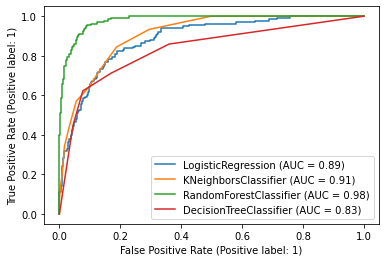

In [158]:
disp=plot_roc_curve(lr,x_new_train,y_train)

plot_roc_curve(kn,x_new_train,y_train,ax=disp.ax_)

plot_roc_curve(clf,x_new_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,x_new_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# how well our model works on our test data:

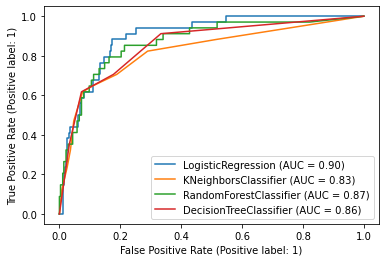

In [159]:
disp=plot_roc_curve(lr,x_new_test,y_test)

plot_roc_curve(kn,x_new_test,y_test,ax=disp.ax_)

plot_roc_curve(clf,x_new_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,x_new_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# we'll go for the random forest model as it will give the best score 91%¶

In [168]:
import pickle
filename='wine.pkl'
pickle.dump(clf,open(filename,'wb'))

# Conclusion:

In [169]:
loaded_model=pickle.load(open('wine.pkl','rb'))
result=loaded_model.score(x_new_test,y_test)
print(result*100)

90.32258064516128
